In [58]:
import os

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
_OUTPUT_DIRECTORY = '/home/ec2-user/SageMaker/results/'


ldirs = os.listdir(_OUTPUT_DIRECTORY)

# Index and config of runs
runs = {}
for run in ldirs:
    try:
        run_ = run.split('_')
        runs[run] = {'pool':run_[0].split('$')[1],
                    'dataset':run_[1].split('$')[1],
                    'ki':run_[2].split('$')[1],
                    'kr':run_[3].split('$')[1],
                    'e':run_[4].split('$')[1],
                    's':run_[5].split('$')[1],
                    'r':run_[6].split('$')[1]
                }
    except:
        pass
    
# List of datasets tested
ldatasets = list(set([runs[k]['dataset'] for k in runs.keys()]))
print(ldatasets)

def get_run_by_dataset(dataset, runs):
    
    runs_ = {}
    
    for k in runs.keys():
        if runs[k]['dataset'] == dataset:
            runs_[k] = runs[k]
    
    return runs_

['half-moons', 'churn', 'boston', 'breast-cancer', 'load-wine']


In [3]:
dataset = 'breast-cancer'
lruns = get_run_by_dataset(dataset, runs)

In [60]:
runs_ = {}
res_ = {}
for k in list(runs.keys()):
    
    try:
        runs_[k] = runs[k]

        df = pd.read_csv(_OUTPUT_DIRECTORY+k+'/PREDS_sampling.csv', index_col=0)    
        competitors = [c for c in df.columns if c!='y_pool_discr']
        res_[k] = {c:f1_score(df.loc[:,'y_pool_discr'], df.loc[:,c], pos_label=1) for c in competitors}

        #runs_[k] = {**runs_[k], **res}
        
    except:
        pass
    
df = pd.concat((pd.DataFrame(runs_).T, pd.DataFrame(res_).T), axis=1)
df = df.melt(id_vars=['pool','dataset','ki','kr','e','s','r'], 
        var_name="competitor", 
        value_name="f1-score")

df = df.astype({'ki': 'int32', 'kr': 'int32', 'e': 'int32', 's': 'float', 'r': 'int32'})
df.head()

#tmp.groupby(['pool','dataset','ki','kr','e','s','r','competitor']).mean()

#df.to_csv(_OUTPUT_DIRECTORY+'/results.csv')

,pool,dataset,ki,kr,e,s,r,competitor,f1-score
0,Basic,boston,10,3,2,0.01,1,P2G-xgb,0.657477
1,Basic,half-moons,6,3,4,0.01,3,P2G-xgb,0.932259
2,AutoGluon,churn,0,10,4,0.01,0,P2G-xgb,NaN
3,AutoGluon,half-moons,40,1,3,0.01,2,P2G-xgb,0.034523
4,Basic,churn,0,0,3,0.01,0,P2G-xgb,NaN


In [70]:
df = pd.read_csv(_OUTPUT_DIRECTORY+'/results.csv')
df = df.dropna()

In [ ]:
for d in df.dataset.unique():

    tmp = df[df.dataset==d][df.pool=="Basic"]

    tmp = tmp.groupby(['pool','dataset','ki','kr','e','s','r','competitor']).mean()
    tmp = tmp.reset_index()
    
    plt.figure()
    ax = sns.lmplot(x="ki", y="f1-score", col="e", hue="competitor", data=tmp)
    #ax.set_title(d)

### Observations TODO

#### F1-score as a function of:
- **number of sampled points (no matter the set of parameters)**
- $k_i$, the number of initial edges between nearest neighbours of $X_{train}$
- $e$, the number of epochs (step of graph refinement)
- $k_e$, the number of edges created for new nodes with nearest neighbours


#### And the following, difference between:
- different pools ("basic", autogluon)
- different datasets

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


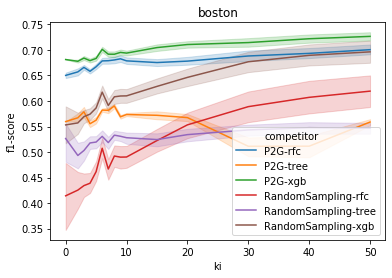

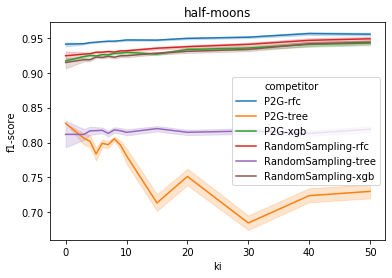

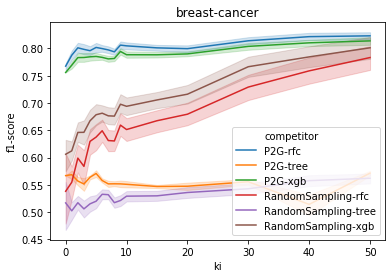

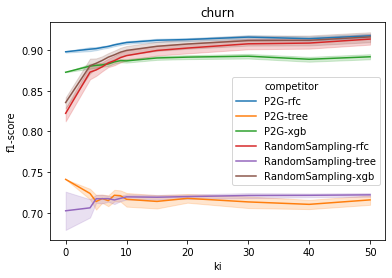

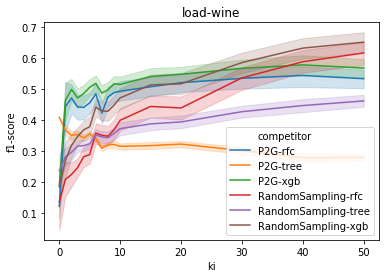

In [71]:
for d in df.dataset.unique():

    tmp = df[df.dataset==d][df.pool=="Basic"]

    tmp = tmp.groupby(['pool','dataset','ki','kr','e','s','r','competitor']).mean()
    tmp = tmp.reset_index()
    
    plt.figure()
    ax = sns.lineplot(x="ki", y="f1-score", hue="competitor", data=tmp)
    ax.set_title(d)

In [76]:
df[df.pool=="AutoGluon"].head()

,Unnamed: 0,pool,dataset,ki,kr,e,s,r,competitor,f1-score
3,3,AutoGluon,half-moons,40,1,3,0.01,2,P2G-xgb,0.034523
7,7,AutoGluon,churn,15,1,3,0.01,1,P2G-xgb,0.078365
8,8,AutoGluon,churn,4,3,2,0.01,3,P2G-xgb,0.043318
11,11,AutoGluon,half-moons,40,1,0,0.01,2,P2G-xgb,0.000303
13,13,AutoGluon,half-moons,9,0,3,0.01,3,P2G-xgb,0.010499


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


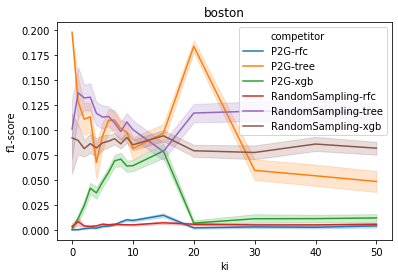

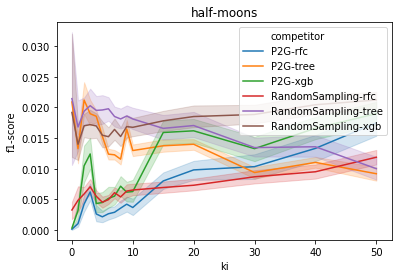

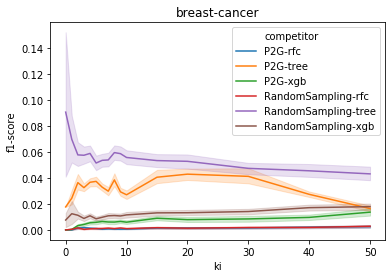

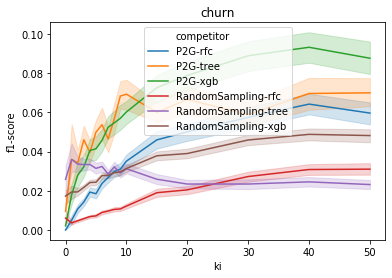

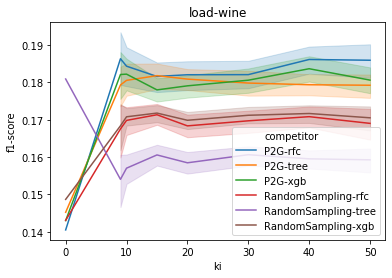

In [72]:
for d in df.dataset.unique():

    tmp = df[df.dataset==d][df.pool=="AutoGluon"]

    tmp = tmp.groupby(['pool','dataset','ki','kr','e','s','r','competitor']).mean()
    tmp = tmp.reset_index()
    
    plt.figure()
    ax = sns.lineplot(x="ki", y="f1-score", hue="competitor", data=tmp)
    ax.set_title(d)

In [3]:
_OUTPUT_DIRECTORY = '/home/ec2-user/SageMaker/results/'

ldirs_empty = os.listdir(_OUTPUT_DIRECTORY)

In [12]:
n_ldirs = np.array([len(os.listdir(_OUTPUT_DIRECTORY+d)) for d in ldirs])
np.sum(n_ldirs>1)

2701

In [36]:
params = pd.DataFrame(runs).T
n_ldirs = np.array([len(os.listdir(_OUTPUT_DIRECTORY+d)) for d in params.index])

In [40]:
tmp = pd.Series(np.array(n_ldirs>1), index=params.index, name='RunFinished')
params = pd.concat((params, tmp), axis=1)

In [56]:
params[params.pool=='Basic'].RunFinished.sum()

8927

In [55]:
params[params.pool=='AutoGluon'].RunFinished.sum()

8239

In [57]:
(params[params.pool=='AutoGluon'].RunFinished.sum()+params[params.pool=='Basic'].RunFinished.sum())/float(params.shape[0])

0.71525